Scenario Load Statistics:
10×5 DataFrame
 Row │ O      Mean      StdDev    Min      Max     
     │ Int64  Float64   Float64   Float64  Float64 
─────┼─────────────────────────────────────────────
   1 │     1  0.682167  0.114668     0.43     0.96
   2 │     2  0.685792  0.114893     0.44     0.97
   3 │     3  0.678764  0.116159     0.43     0.96
   4 │     4  0.680778  0.11362      0.44     0.97
   5 │     5  0.680458  0.114843     0.42     0.96
   6 │     6  0.685931  0.114206     0.44     0.97
   7 │     7  0.683444  0.11489      0.44     0.95
   8 │     8  0.682958  0.114949     0.43     0.98
   9 │     9  0.680028  0.114988     0.44     0.96
  10 │    10  0.684736  0.116282     0.43     0.96

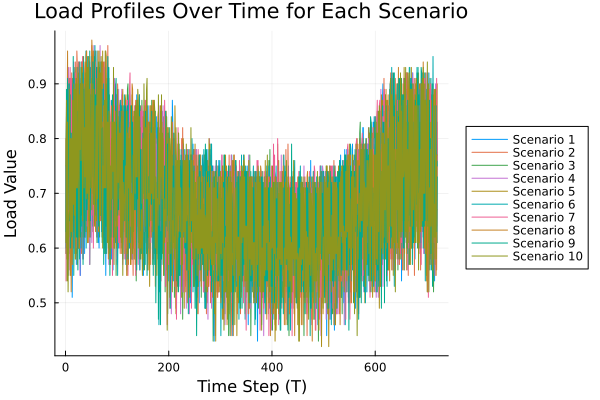

In [15]:
using CSV, DataFrames, Statistics, Plots

# Load data
df = CSV.read("data/load_profile.csv", DataFrame)

# Group by scenario (O) and compute statistics
scenario_stats = combine(groupby(df, :O), 
    :value => mean => :Mean,
    :value => std => :StdDev,
    :value => minimum => :Min,
    :value => maximum => :Max
)

println("Scenario Load Statistics:")
show(scenario_stats, allrows=true, allcols=true)

# Pivot to wide format for plotting
df_wide = unstack(df, :T, :O, :value)

# Plot
plot()
for col in names(df_wide)[2:end]
    plot!(df_wide.T, df_wide[!, col], label="Scenario $col")
end
xlabel!("Time Step (T)")
ylabel!("Load Value")
title!("Load Profiles Over Time for Each Scenario")
plot!(legend=:outerright)
